In [3]:
%matplotlib inline
%load_ext autoreload

In [4]:
# %load runBicycleTest.py
import numpy as np
import matplotlib.pyplot as plt
import rhs
import LinearController
import graph
from unpackState import *
from tableBased import *
import integrator
import scipy.integrate as inter
import time
%autoreload 2


# use Euler Integration to simulate a bicycle


In [5]:



import LinearController
from StateGridPoints import *
from runBicycleTest import *
import time
from valueIteration import *
from LinearController import getLQRGains
from datetime import datetime
from matplotlib import colors
import parameters
%load_ext autoreload
%autoreload LinearController
%autoreload valueIteration.
%autoreload parameters
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def calc_basin_of_attraction(controller, name, state_table_flag, v,
                             save = True, delta_limit = None, max_steer_rate = None):
    #state_table_flag is for the state table we will use to make the
    # grid points (ie, the controller may have been trained on a 
    #different one, but it will be plotted on state_table_flag)
    
    GridPoints = StateGridPoints()
    GridPoints.set_state_grid_points(state_table_flag)

  #with delta = 0

    phi_points, phi_dot_points,  delta_points = \
        np.meshgrid(GridPoints.phi_grid, GridPoints.phi_dot_grid,
                    [0.0])
    #if change delta from 0, think carefully about how
    #to mirror the points when plotting it
    
    phi_and_phi_dot_points= np.rec.fromarrays([phi_points, 
                                               phi_dot_points,
        delta_points], 
        names='phi_points,phi_dot_points, delta_points')
    
    print("calculating basis of attraction for controller " +
          name)
    success_array = np.zeros((GridPoints.len_phi_half_grid,
      GridPoints.len_phi_dot_grid))
     
    for (i, phi) in enumerate(GridPoints.phi_half_grid):

        print("phi: " + str(phi))
        for (j, phi_dot) in enumerate(GridPoints.phi_dot_grid):

            (success, _ ) = runBicycleTest(stateflag = None, 
                                           controller = controller,
            name = "", reward_flag = 14, simulation_duration= 2.0,
            isGraphing  = False, figObject = None, isPrinting = False,
            integrator_method = "fixed_step_RK4",
            USE_LINEAR_EOM = False, timestep = 1/50,
            starting_state3 = [phi, phi_dot, 0.0],
            v = v, delta_limit = delta_limit, max_steer_rate = max_steer_rate)

            success_array[i,j] = success
    
    if save:
        np.savetxt("BasinOfAttraction/"+ name 
                   + "_BasisOfAttraction.csv", success_array,
           delimiter = ",")

    
    return success_array

In [7]:
def load_basin(name):
    success_array = np.loadtxt("BasinOfAttraction/"+ name 
                   + "_BasisOfAttraction.csv",
           delimiter = ",")
    return success_array

In [8]:
def calc_d_size(controller, v):
    
    
    #everything is in terms of phi and phi_dot, not pixels
    n = 200
    phi_dot_ortho_list = np.linspace(0,0.178,n)  #start at 0 because we only want to search over half of the state space
    phi_ortho_list = phi_dot_ortho_list*(.975/.223)
    
    success_array = np.zeros(n)
    
    for i in range(n):
        phi_dot = phi_dot_ortho_list[i]
        phi = phi_ortho_list[i]
        
        (success, _ ) = runBicycleTest(stateflag = None, 
            controller = controller,
            name = "", reward_flag = 14, simulation_duration= 2.0,
            isGraphing  = False, figObject = None, isPrinting = False,
            integrator_method = "fixed_step_RK4",
            USE_LINEAR_EOM = False, timestep = 1/50,
            starting_state3 = [phi, phi_dot, 0.0],
            v = v)

        success_array[i] = success
    
    #make sure there is a boundry between falling and not falling that we can reach
    assert(success_array[0] != success_array[-1])
    
    i_s = np.nonzero(0==success_array)
   
    i = i_s[0][0]    #why do I need to index twice, idk man. np.nonzero is wierd
    d_phi = phi_ortho_list[i]
    d_phi_dot = phi_dot_ortho_list[i]
    
    return (d_phi_dot,d_phi)
    
#     xpoints_ortho = xpoints_ortho + GridPoints.len_phi_dot_grid//2
#     ypoin

In [9]:
linear_0_5_controller = LinearController.LinearController(getLQRGains("lqrd_0.5m_s"))
linear_0_25_controller =  LinearController.LinearController(getLQRGains("lqrd_0.25m_s"))
linear_1_controller =  LinearController.LinearController(getLQRGains("lqrd_1m_s"))
linear_1_5_controller =  LinearController.LinearController(getLQRGains("lqrd_1.5m_s"))
linear_2_controller =  LinearController.LinearController(getLQRGains("lqrd_2m_s"))
linear_2_5_controller =  LinearController.LinearController(getLQRGains("lqrd_2.5m_s"))
linear_3_controller =  LinearController.LinearController(getLQRGains("lqrd_3m_s"))
linear_3_5_controller =  LinearController.LinearController(getLQRGains("lqrd_3.5m_s")) 
linear_4_controller =  LinearController.LinearController(getLQRGains("lqrd_4m_s"))

d_0_25_lin = calc_d_size(linear_0_25_controller, v = 0.25)
d_0_5_lin = calc_d_size(linear_0_5_controller, v = 0.5)
d_1_lin = calc_d_size(linear_1_controller, v = 1.0)
d_1_5_lin = calc_d_size(linear_1_5_controller, v = 1.5)
d_2_lin = calc_d_size(linear_2_controller, v = 2.0)
d_2_5_lin = calc_d_size(linear_2_5_controller, v = 2.5)
d_3_lin = calc_d_size(linear_3_controller, v = 3.0)
d_3_5_lin = calc_d_size(linear_3_5_controller, v = 3.5)  #on edge of feasibility region (phi = pi/4). Not representative
d_4_lin = calc_d_size(linear_4_controller, v = 4.0)


In [13]:
d_3_lin


(0.1744221105527638, 0.7626078824616355)

In [175]:
#not run on 5/17/19
d_0_25_lin = d_0_25
d_0_5_lin = d_0_5
d_1_lin = d_1
d_2_lin = d_2
d_3_lin = d_3

In [178]:
d_0_25_lin

(0.025428571428571425, 0.11117873158231902)

In [10]:
def calc_d_VI(v, controller_name):

    #name = "VI_r14_s6_a1"
    #name = "VI_r14_a1_s16_v1_50episodes"
    # name = "VI_r14_a1_s16_v0.5_100episodes"
    #name = "VI_r14_a1_s16_v2_30episodes"
    VI_model = ValueIteration(state_grid_flag = 16, action_grid_flag = 8,
    reward_flag = 14, Ufile = "modelsB/"+controller_name, use_only_continuous_actions = False,
    remake_table = False, step_table_integration_method = "fixed_step_RK4",
    USE_LINEAR_EOM = False, name = controller_name, timestep = 1/50, v = v)


    VI_model.init_controller(use_continuous_actions = True,
      use_continuous_state_with_discrete_actions = True,
      controller_integration_method = "fixed_step_RK4",
      use_regression_model_of_table = False)

    return calc_d_size(VI_model, v = v)

In [408]:
d_0_25_VI = calc_d_VI(0.25, "VI_r14_a1_s16_v0.25_100episodes")
d_0_5_VI = calc_d_VI(0.5, "VI_r14_a1_s16_v0.5_100episodes")
d_1_VI = calc_d_VI(1, "VI_r14_a1_s16_v1_50episodes")


Initializing VI model


TypeError: super(type, obj): obj must be an instance or subtype of type

In [42]:
d_2_VI_limited = calc_d_VI(2,"VI_r14_a9_s16_2_v2_g95_limB_300episodes_reward_table")

NameError: name 'calc_d_VI' is not defined

In [35]:
d_2_lin =  calc_d_size(linear_2_controller, v = 2.0)

In [365]:
d_0_25_old = d_0_25
d_0_5_old = d_0_5
d_1_old = d_1
d_2_old = d_2
d_3_old = d_3
d_vals_list_old = [d_0_25_old, d_0_5_old, d_1_old, d_2_old, d_3_old]

1.0 1.0
1.0 1.0
[2.0, 2.0] [1.41421356 1.41421356]
r_squared =  0.0


C:\Users\dylan\Miniconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm


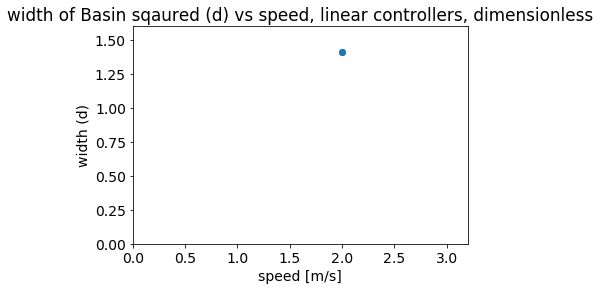

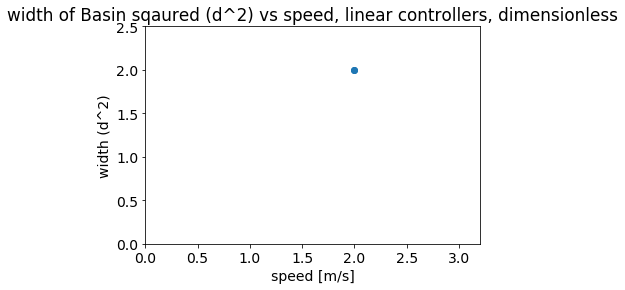

In [447]:
import scipy.optimize as optimization
import scipy.stats as stats



#plot different d values vs speed
d_vals_list = [d_0_25_lin, d_0_5_lin, d_1_lin, d_1_5_lin, d_2_lin, d_2_5_lin, d_3_lin]
speeds = [0.25, 0.5, 1, 1.5, 2, 2.5, 3]
n = len(d_vals_list)

d_mags = np.zeros(n)
d_phis = np.zeros(n)
d_mags_squared = np.zeros(n)
d_mags_unscaled = np.zeros(n)

for (i, d_vals) in enumerate(d_vals_list):
    #dividing by things normalizes everything
    phi_dot_dimensionless = d_vals[0]/d_vals_list[-1][0]
    phi_dimensionless = d_vals[1]/d_vals_list[-1][1]
    print(phi_dot_dimensionless, phi_dimensionless)
    d_mags[i] = np.sqrt(( phi_dot_dimensionless)**2 + (phi_dimensionless)**2)
    d_mags_unscaled[i] = np.sqrt(( d_vals[0])**2 + (d_vals[1])**2)
    d_phis[i] = d_vals[1]/d_vals_list[-1][1]
    
    ##try squareing dmag to find if we have a sqrt relationship
    d_mags_squared[i] = d_mags[i]**2;
    

print(speeds, d_mags)


## do least squares fit
def func(x, b, m):
    return m*x+b
slope, intercept, r_value, p_value, std_err = stats.linregress(speeds, d_mags_squared)
# print("linregress", slope, intercept)
y_est = np.zeros(n)
for (i,v) in enumerate(speeds):
    y_est[i] = slope*v + intercept
print("r_squared = ", r_value**2)

#plot magnitude without squaring it
fig, ax = plt.subplots(1,1)
ax.plot(speeds, d_mags, "-o")
#ax.plot(speeds, d_phis,"o")
#ax.plot(speeds, d_mags_unscaled, "o")
ax.set_title("width of Basin sqaured (d) vs speed, linear controllers, dimensionless")
ax.set_ylabel("width (d)")
ax.set_xlabel("speed [m/s]")
ax.set_ylim([0,1.6])
ax.set_xlim([0,3.2])


fig, ax = plt.subplots(1,1)
ax.plot(speeds, d_mags_squared, "o")
# ax.plot(speeds, y_est)
#ax.plot(speeds, d_phis,"o")
#ax.plot(speeds, d_mags_unscaled, "o")
ax.set_title("width of Basin sqaured (d^2) vs speed, linear controllers, dimensionless")
ax.set_ylabel("width (d^2)")
ax.set_xlabel("speed [m/s]")
ax.set_ylim([0,2.5])
ax.set_xlim([0,3.2])
#ax.plot(speeds, d_phis)

plt.show()

In [451]:
print("d_VI:", d_2_VI_limited)
print("d_lin:",d_2_lin_limited)
mag_VI = np.sqrt(d_2_VI_limited[0]**2 + d_2_VI_limited[1]**2)
mag_lin = np.sqrt(d_2_lin_limited[0]**2 + d_2_lin_limited[1]**2)


(0.04114572864321608, 0.17989724406787297)
(0.038462311557788946, 0.16816481510692477)


In [54]:
def plot_basin_from_arrays(success_arrays, names, state_table_flag, d_vals_list = None):
    #success_arrays is a list of arrays of successes each generated
    #with a call to 'calc_basin_of_attraction'
    n = len(success_arrays)
    
    fig=plt.figure(figsize=(18, 10*n), dpi= 80, facecolor='w', edgecolor='k')
    axs = fig.subplots(n,1)
    
    GridPoints = StateGridPoints()
    GridPoints.set_state_grid_points(state_table_flag)
    
    #scale multiplier is the difference between the phi and phi_dot scales
    if state_table_flag == 16.2:
        scale_multiplier = 2
        phi_scale = 50
        phi_dot_scale = 25
    elif state_table_flag == 16.3:
        scale_multiplier = 1
        phi_scale = 25
        phi_dot_scale = 25
    
    difference_array = np.zeros((GridPoints.len_phi_grid, GridPoints.len_phi_dot_grid))
    
    ##### get line of constant energy? to plot (eigvector of A)
    xpoints = np.linspace(-GridPoints.len_phi_dot_grid//2, 
                          GridPoints.len_phi_dot_grid//2,51)
    h = 0.516; g = 9.81;
    phi_dot_points = xpoints / phi_dot_scale;
    ypoints = np.arccos(1 - h/(2*g)*phi_dot_points**2)* (-np.sign(xpoints))*(phi_scale)
#     ypoints_linear = xpoints*(-0.223/0.975)*(scale_multiplier) #scale by 2 since phi_dot grid has 2x the spacing of phi grid
    #magic numbers from eigenvector of A w/ negative eigenvalue
    # phi = - sqrt(h/g) * phi_dot
#     ypoints = np.interp(ypoints_unscaled, 
#            (ypoints_unscaled.min(), ypoints_unscaled.max()),
#            (GridPoints.len_phi_half_grid*-1, 
#             GridPoints.len_phi_half_grid))
    
    #more origin to center
    xpoints = xpoints + GridPoints.len_phi_dot_grid//2
    ypoints = ypoints + GridPoints.len_phi_grid//2
#     ypoints_linear = ypoints_linear + GridPoints.len_phi_grid//2
    

    #test plotting orthogonal line
#     xpoints_ortho = np.linspace(-0.178, 0.178,31)*20 #since scale is 0.4
#     ypoints_ortho = xpoints_ortho*(.975/.223)*scale_multiplier
    
#     xpoints_ortho = xpoints_ortho + GridPoints.len_phi_dot_grid//2
#     ypoints_ortho = ypoints_ortho + GridPoints.len_phi_grid//2
    
    #####
    
    
    print("Success Graphs:")
    print("Red= failure, Green = success")
    for idx in range(n):
           
        ax1 = axs[idx]
    
        success_array = success_arrays[idx]
        #print(np.shape(success_array))
        
        d_vals = d_vals_list[idx]
        #define edges to plot basin of attraction
        phi_offset = d_vals[1]
        phi_dot_offset = d_vals[0]
        x_boundry_upper = xpoints - phi_dot_offset*phi_dot_scale
        y_boundry_upper = ypoints - phi_offset*phi_scale
        x_boundry_lower = xpoints + phi_dot_offset*phi_dot_scale
        y_boundry_lower = ypoints + phi_offset*phi_scale
        
#         x_boundry_upper_lin = xpoints - phi_dot_offset*phi_dot_scale
#         y_boundry_upper_lin = ypoints_linear - phi_offset*phi_scale
#         x_boundry_lower_lin = xpoints + phi_dot_offset*phi_dot_scale
#         y_boundry_lower_lin = ypoints_linear + phi_offset*phi_scale
        
        success_array = np.concatenate(
            (np.flip(success_array[1:,:],axis = (0,1)),
                     success_array[:,:]),
             axis = 0)
        #print(np.shape(success_array))       
        #define colormap
        cmap = colors.ListedColormap(['red','green'])
        bounds = [-0.5,0.5 ,1.5]
        norm= colors.BoundaryNorm(bounds, cmap.N)
        
        if idx==0:
            difference_array += success_array
        elif idx==1:
            difference_array -= success_array
        else:
            print("** Difference Array not computed for index " + str(idx))

        max_phi = GridPoints.phi_grid[-1]
        max_phi_dot = GridPoints.phi_dot_grid[-1]
        im1 = ax1.imshow(success_array, cmap=cmap, norm = norm)
                        #extent = [-max_phi_dot, max_phi_dot,
                        #         -max_phi, max_phi] )
        ax1.set_title(str(names[idx])+" Basin of Attraction (delta = 0)")
        ax1.set_ylabel("lean [rad]")
        ax1.set_xlabel("lean rate [rad/s]")
        ax1.set_yticks(np.arange(GridPoints.len_phi_grid))
        ax1.set_xticks(np.arange(GridPoints.len_phi_dot_grid))
        ax1.set_yticklabels(np.around(GridPoints.phi_grid, decimals=2))
        ax1.set_xticklabels(np.around(GridPoints.phi_dot_grid, decimals = 2))
        
        #make labels prettier
        for label in ax1.xaxis.get_ticklabels():
            label.set_visible(False)
        for label in ax1.xaxis.get_ticklabels()[::4]:
            label.set_visible(True)
        for label in ax1.yaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        
        ax1.plot(xpoints, ypoints, 'w', linewidth=4.0)    
        ax1.plot(xpoints, ypoints_linear, 'k')
        ax1.plot( x_boundry_upper,  y_boundry_upper,'w')
        ax1.plot( x_boundry_lower,  y_boundry_lower,'w')
#         ax1.plot( x_boundry_upper_lin,  y_boundry_upper_lin,'k')
#         ax1.plot( x_boundry_lower_lin,  y_boundry_lower_lin,'k')
        
#         ax1.plot(xpoints_ortho, ypoints_ortho, '.c')  
        
    fig2=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    ax2 = fig2.subplots(1,1)
    #plot differences
    
    print("Differences Graph: ")
    colors_to_plot = ['yellow','white','purple']
    print(colors_to_plot[0]+": "+names[1]+" success only")
    print(colors_to_plot[1]+": both controllers same")
    print(colors_to_plot[2]+": "+names[0]+" success only")
    #define colormap
    cmap = colors.ListedColormap(colors_to_plot)
    bounds = [-1.5, -.5, .5 ,1.5]
    norm= colors.BoundaryNorm(bounds, cmap.N)
    
    im2 = ax2.imshow(difference_array,cmap = cmap, norm=norm)
    ax2.set_title(" Difference between " + str(names[0])+ " and " + str(names[1]))
    ax2.set_ylabel("lean [rad]")
    ax2.set_xlabel("lean rate [rad/s]")
    ax2.set_yticks(np.arange(GridPoints.len_phi_grid))
    ax2.set_xticks(np.arange(GridPoints.len_phi_dot_grid))
    ax2.set_yticklabels(np.around(GridPoints.phi_grid, decimals=2))
    ax2.set_xticklabels(np.around(GridPoints.phi_dot_grid, decimals = 2))
    
      #make labels prettier
    for label in ax2.xaxis.get_ticklabels():
        label.set_visible(False)
    for label in ax2.xaxis.get_ticklabels()[::4]:
        label.set_visible(True)
    for label in ax2.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    
    ax2.plot(xpoints, ypoints, 'b')    
        
    plt.show()

In [12]:
name1 = "linear_0_5"
name2 = "linear_0_25"
state_table_flag = 16.3

In [263]:
#calc basin for 0.5m/s
# linear_0_5_deldeot_5_SA
linear_0_5_deldeot_4_6_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_0.5m_s")),
    name = "linear_0_5_lim_4_6", 
    state_table_flag = state_table_flag, 
    v = 0.5,
    save = True,
    max_steer_rate = 4.6)

Using State Grid Flag 16.3
calculating basis of attraction for controller linear_0_5_lim_4_6
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [22]:
#calc basin for 0.25m/s

linear_2_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_2m_s")),
    name = "lin_2", 
    state_table_flag = state_table_flag, 
    v = 2.0,
    save = True)

Using State Grid Flag 16.3
calculating basis of attraction for controller lin_2
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [151]:
linear_0_1_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_1m_s")),
    name = name2, 
    state_table_flag = state_table_flag, 
    v = 1,
    save = True)

linear_0_2_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_2m_s")),
    name = name2, 
    state_table_flag = state_table_flag, 
    v = 2,
    save = True)

linear_0_3_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_3m_s")),
    name = name2, 
    state_table_flag = state_table_flag, 
    v = 3,
    save = True)

Using State Grid Flag 16.3
calculating basis of attraction for controller linear_0_25
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76
Using State Grid Flag 16.3
calculating basis of attraction for controller linear_0_25
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76
Using State Grid Flag 16.3
calculating basis of attraction for controller linear_0_25
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.

In [27]:
def calc_VI_BoA(v, controller_name, SA_name, state_table_flag):

    #name = "VI_r14_s6_a1"
    #name = "VI_r14_a1_s16_v1_50episodes"
    # name = "VI_r14_a1_s16_v0.5_100episodes"
    #name = "VI_r14_a1_s16_v2_30episodes"
    VI_model = ValueIteration(state_grid_flag = 16, action_grid_flag = 8, #16, 8
    reward_flag = 14, Ufile = "modelsB/"+controller_name, use_only_continuous_actions = False,
    remake_table = False, step_table_integration_method = "fixed_step_RK4",
    USE_LINEAR_EOM = False, name = controller_name, timestep = 1/50, v = v)


    VI_model.init_controller(use_continuous_actions = True,
      use_continuous_state_with_discrete_actions = True,
      controller_integration_method = "fixed_step_RK4",
      use_regression_model_of_table = False)

    VI_SA = calc_basin_of_attraction(
        controller = VI_model,
        name = SA_name, 
        state_table_flag = state_table_flag, 
        v = v,
        save = True)
    
    return VI_SA

In [165]:
VI_0_5_SA = calc_VI_BoA(v=0.5, controller_name = "VI_r14_a1_s16_v0.5_100episodes",
                        SA_name = "VI_0_5", state_table_flag = state_table_flag)

Initializing VI model
Using State Grid Flag 16
Loading step_table modelsB/VI_r14_a1_s16_v0.5_100episodes.csv from file
Initialized VI Model modelsB/VI_r14_a1_s16_v0.5_100episodes.csv in 204.39619898796082sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_0_5
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [166]:
VI_0_25_SA = calc_VI_BoA(v=0.25, controller_name = "VI_r14_a1_s16_v0.25_100episodes",
                        SA_name = "VI_0_25", state_table_flag = state_table_flag)

Initializing VI model
Using State Grid Flag 16
Loading step_table modelsB/VI_r14_a1_s16_v0.25_100episodes.csv from file
Initialized VI Model modelsB/VI_r14_a1_s16_v0.25_100episodes.csv in 181.79288864135742sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_0_25
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [25]:
VI_1_SA = calc_VI_BoA(v=1.0, controller_name = "VI_r14_a8_s16_2_v1_g95_limB_300episodes",
                        SA_name = "VI_1", state_table_flag = state_table_flag)

Initializing VI model
Using State Grid Flag 16.2
Loading step_table modelsB/VI_r14_a8_s16_2_v1_g95_limB_300episodes.csv from file
Initialized VI Model modelsB/VI_r14_a8_s16_2_v1_g95_limB_300episodes.csv in 148.1028757095337sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_1
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [20]:
VI_2_SA = calc_VI_BoA(v=2.0, controller_name = "VI_r14_a9_s16_2_v2_g95_limB_300episodes",
                        SA_name = "VI_2", state_table_flag = state_table_flag)

Initializing VI model
Using State Grid Flag 16.2
Loading step_table modelsB/VI_r14_a9_s16_2_v2_g95_limB_300episodes.csv from file
Initialized VI Model modelsB/VI_r14_a9_s16_2_v2_g95_limB_300episodes.csv in 222.1518235206604sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_2
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [29]:

VI_0_25_SA = calc_VI_BoA(v=0.25, controller_name = "VI_r14_a8_s16_v0_25_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_0_5_SA = calc_VI_BoA(v=0.5, controller_name = "VI_r14_a8_s16_v0_5_g95_limB_300episodes",
                       SA_name = "VI_3", state_table_flag = state_table_flag)
VI_0_75_SA = calc_VI_BoA(v=0.75, controller_name = "VI_r14_a8_s16_v0_75_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_1_SA = calc_VI_BoA(v=1.0, controller_name = "VI_r14_a8_s16_v1_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_1_5_SA = calc_VI_BoA(v=1.5, controller_name = "VI_r14_a8_s16_v1_5_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_2_SA = calc_VI_BoA(v=2.0, controller_name = "VI_r14_a8_s16_v2_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_2_5_SA = calc_VI_BoA(v=2.5, controller_name = "VI_r14_a8_s16_v2_5_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)
VI_3_SA = calc_VI_BoA(v=3.0, controller_name = "VI_r14_a8_s16_v3_g95_limB_300episodes",
                        SA_name = "VI_3", state_table_flag = state_table_flag)

d_0_25_VI = calc_d_VI(0.25, "VI_r14_a8_s16_v0_25_g95_limB_300episodes")
d_0_5_VI = calc_d_VI(0.5, "VI_r14_a8_s16_v0_5_g95_limB_300episodes")
d_0_75_VI = calc_d_VI(0.75, "VI_r14_a8_s16_v0_75_g95_limB_300episodes")
d_1_VI = calc_d_VI(1.0, "VI_r14_a8_s16_v1_g95_limB_300episodes")
d_1_5_VI = calc_d_VI(1.5, "VI_r14_a8_s16_v1_5_g95_limB_300episodes")
d_2_VI = calc_d_VI(2.0, "VI_r14_a8_s16_v2_g95_limB_300episodes")
d_2_5_VI = calc_d_VI(2.5, "VI_r14_a8_s16_v2_5_g95_limB_300episodes")
d_3_VI = calc_d_VI(3.0, "VI_r14_a8_s16_v3_g95_limB_300episodes")



Initializing VI model
Using State Grid Flag 16
Loading step_table modelsB/VI_r14_a8_s16_v0_25_g95_limB_300episodes.csv from file
Initialized VI Model modelsB/VI_r14_a8_s16_v0_25_g95_limB_300episodes.csv in 85.98202800750732sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_3
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76
Initializing VI model
Using State Grid Flag 16
Loading step_table modelsB/VI_r14_a8_s16_v0_5_g95_limB_300episodes.csv from file
Initialized VI Model modelsB/VI_r14_a8_s16_v0_5_g95_limB_300episodes.csv in 90.4999611377716sec
Using State Grid Flag 16.3
calculating basis of attraction for controller VI_3
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
ph

In [30]:
d_3_VI

(0.1207537688442211, 0.5279593032426707)

In [277]:
linear_0_5_del_0_8_SA = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_0.5m_s")),
    name = "linear_0_5_lim_4_8", 
    state_table_flag = state_table_flag, 
    v = 0.5,
    save = True,
    delta_limit = 0.8)

Using State Grid Flag 16.3
calculating basis of attraction for controller linear_0_5_lim_4_8
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


In [29]:
#VI_2_SA_limited = load_basin("VI_r14_a8_s16_2_v2_g95_limB_300episodes")
linear_2_SA = load_basin("lin_2_limited")

In [37]:
VI_2_SA_limited = calc_VI_BoA(v=2.0, controller_name = "VI_r14_a8_s16_v2__ddel_1_18_del_08_300episodes",
                        SA_name = "VI_2_limited", state_table_flag = state_table_flag)

NameError: name 'calc_VI_BoA' is not defined

In [293]:
# linear_2_delDot4_del08 = calc_basin_of_attraction(
#     controller = LinearController.LinearController(
#         getLQRGains("lqrd_2m_s")),
#     name = "none", 
#     state_table_flag = state_table_flag, 
#     v = 2,
#     save = True,
#     max_steer_rate = 4,
#     delta_limit = 0.8)
linear_2_delDot10_del08 = calc_basin_of_attraction(
    controller = LinearController.LinearController(
        getLQRGains("lqrd_2m_s")),
    name = "none", 
    state_table_flag = state_table_flag, 
    v = 2,
    save = True,
    max_steer_rate = 10,
    delta_limit = 0.8)

Using State Grid Flag 16.3
calculating basis of attraction for controller none
phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24000000000000002
phi: 0.27999999999999997
phi: 0.32
phi: 0.36
phi: 0.39999999999999997
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6000000000000001
phi: 0.64
phi: 0.68
phi: 0.7200000000000001
phi: 0.76


Using State Grid Flag 16.3
Success Graphs:
Red= failure, Green = success


NameError: name 'ypoints_linear' is not defined

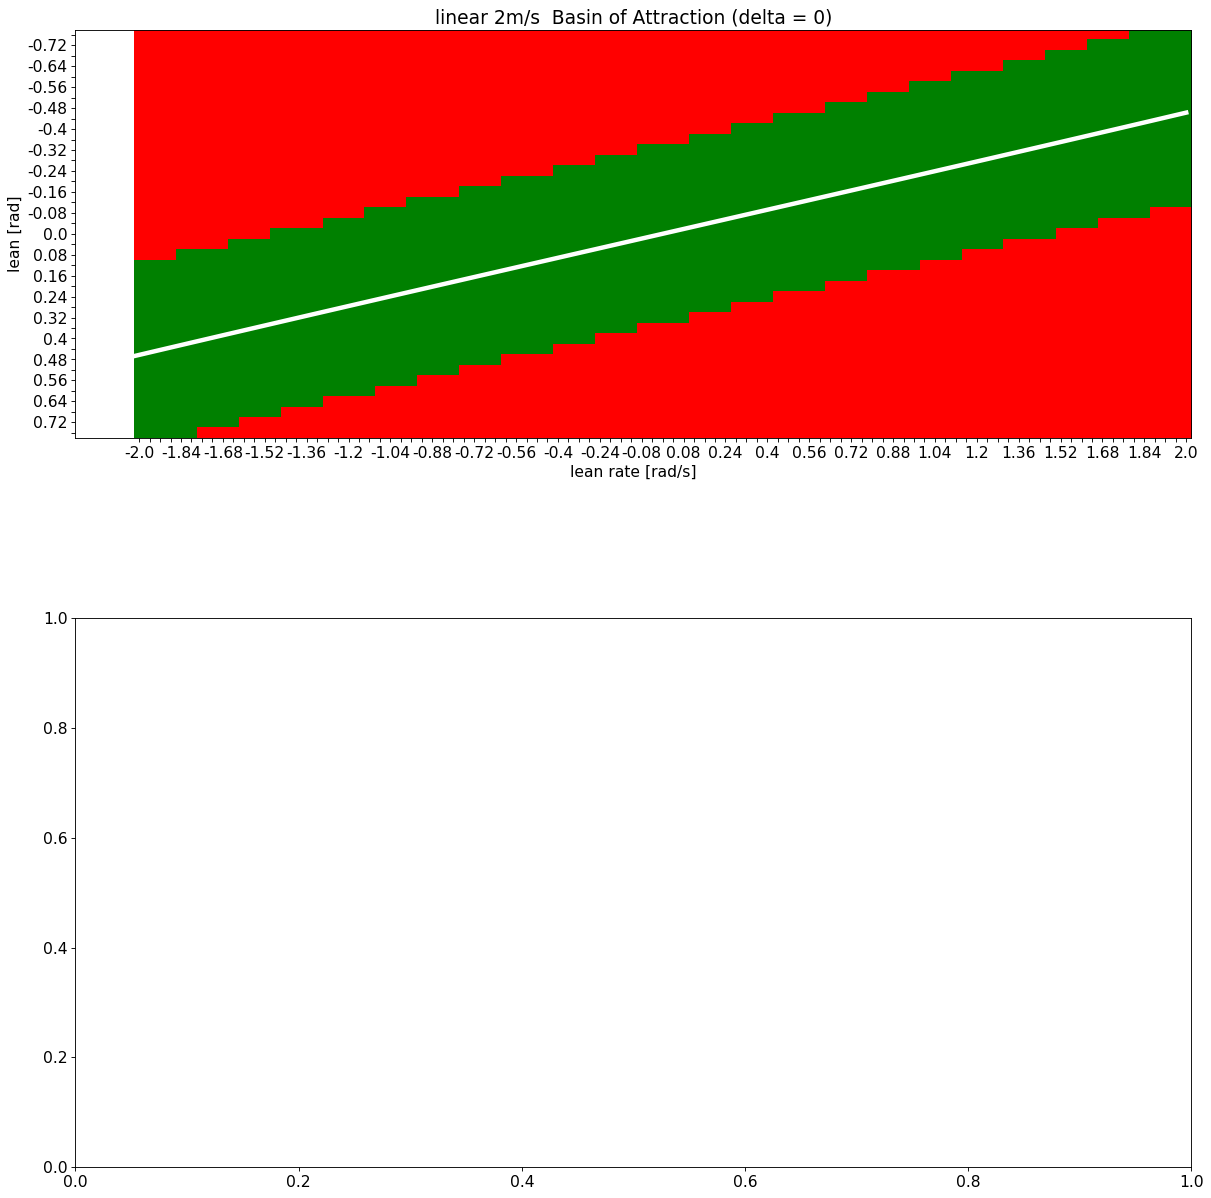

In [55]:
#success_arrays_notloaded = [linear_0_5_SA, linear_0_25_SA]
plot_basin_from_arrays(success_arrays = [linear_2_SA , VI_2_SA] ,
                       names = ["linear 2m/s ", "nonlinear 2m/s"], 
                       state_table_flag = state_table_flag,
                      d_vals_list = [d_2_lin, d_2_lin ])